In [1]:
from utils import collect
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_context("talk")
sns.set_style("whitegrid")

import string

NAME_TEACHERS = {"AttentionDistill": "Attention (AT)", "KnowledgeDistill": "Original (KD)", "ContrastiveDistill": "Contrastive (CRD)"}
MARKERS_TEACHERS = {"Attention (AT)": "X" , "Original (KD)": "^", "Contrastive (CRD)": "h"}

In [3]:
df=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/resnet34/"))

In [5]:
a=df.query("Amda").iloc[0]

In [6]:
a["Path"]

'/work/dlclarge2/agnihotr-shashank-pruneshift/resnet34/amda'

In [20]:
df=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/final_cifar100/distillation")).sort_values(by=["Loss", "Augmix","Cifar100 Error"])

In [2]:
collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/teachers/resnet50_augmix"))

,Amda,Augmix,Cifar100 Error,Cifar100-C Error,DeepAugment,Epochs,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture
300,False,True,27.26,37.821585,False,100,0.1,StandardLoss,resnet50,/work/dlclarge2/agnihotr-shashank-pruneshift/t...,1,0.0002,None,None


In [21]:
df=df.drop_duplicates(["Loss", "Augmix"])

In [22]:
df_std=df.query("not Augmix")
df_aug=df.query("Augmix")

In [23]:
df_std

,Amda,Augmix,Cifar100 Error,Cifar100-C Error,DeepAugment,Epochs,LearningRate,Loss,Network,Path,Scaling,Teacher,WeightDecay,kd_T,kd_mixture
300,False,False,28.619999,47.158313,False,100,0.1,AttentionDistill,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,AM ResNet50,0.0002,4.0,None
300,False,False,24.669999,39.943784,False,100,0.1,ContrastiveDistill,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,AM ResNet50,0.0002,4.0,None
300,False,False,24.589998,39.572418,False,100,0.1,KnowledgeDistill,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,AM ResNet50,0.0002,4.0,0.9


In [24]:
df_baseline=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/final_cifar100/baseline/standard"))
df_baseline

,Amda,Augmix,Cifar100 Error,Cifar100-C Error,DeepAugment,Epochs,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture
300,False,False,25.150001,49.388313,False,100,0.1,StandardLoss,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,0.0002,None,None


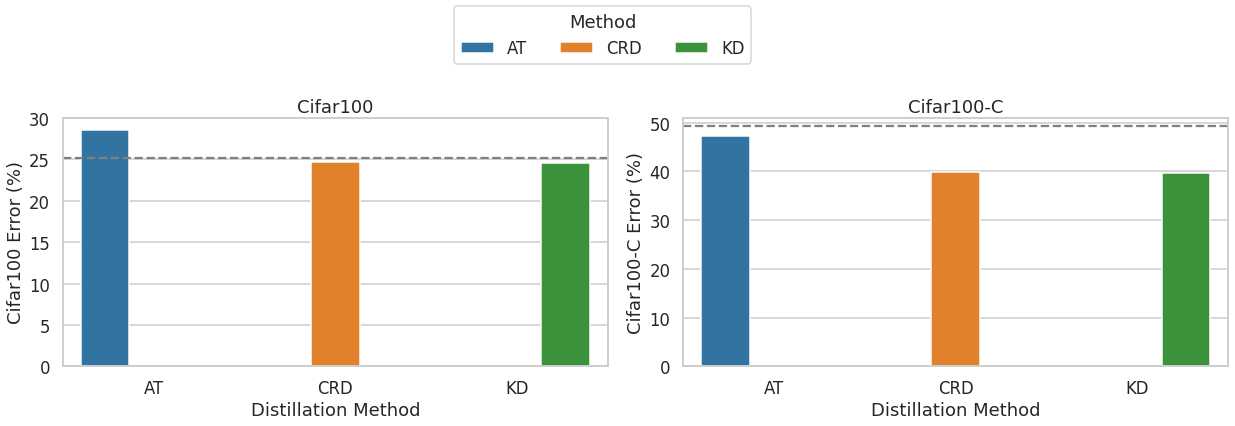

In [33]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(17.5, 5))
df_std=df_std.replace("AttentionDistill", "AT")
df_std=df_std.replace("ContrastiveDistill", "CRD")
df_std=df_std.replace("KnowledgeDistill", "KD")
for ax, error in zip(axes.flatten(), ["Cifar100 Error", "Cifar100-C Error"]):
    sns.barplot(data=df_std, x="Loss", y=error, hue="Loss", ax=ax)
    ax.set_xlabel("Distillation Method")
    ax.set_ylabel(error + " (%)")
    if error=="Cifar100-C Error":
        ax.set_ylim(0,51)
    ax.set_title(error.split(" ")[0])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend('', frameon=False)
    ax.axhline(df_baseline.query("Network == 'resnet18'")[error].item(), color="grey", ls="dashed")
fig.legend(handles, labels, bbox_to_anchor=(0.37, 1.2), loc=2, borderaxespad=0., ncol=3, title='Method')
fig.tight_layout()
plt.savefig(f"figures/distillation_std.pdf")

In [29]:
df_aug_baseline=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/final_cifar100/baseline/augmix"))
df_aug_baseline

,Amda,Augmix,Cifar100 Error,Cifar100-C Error,DeepAugment,Epochs,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture
300,False,True,26.990002,36.449265,False,100,0.1,StandardLoss,resnet18,/work/dlclarge2/agnihotr-shashank-pruneshift/f...,1,0.0002,None,None


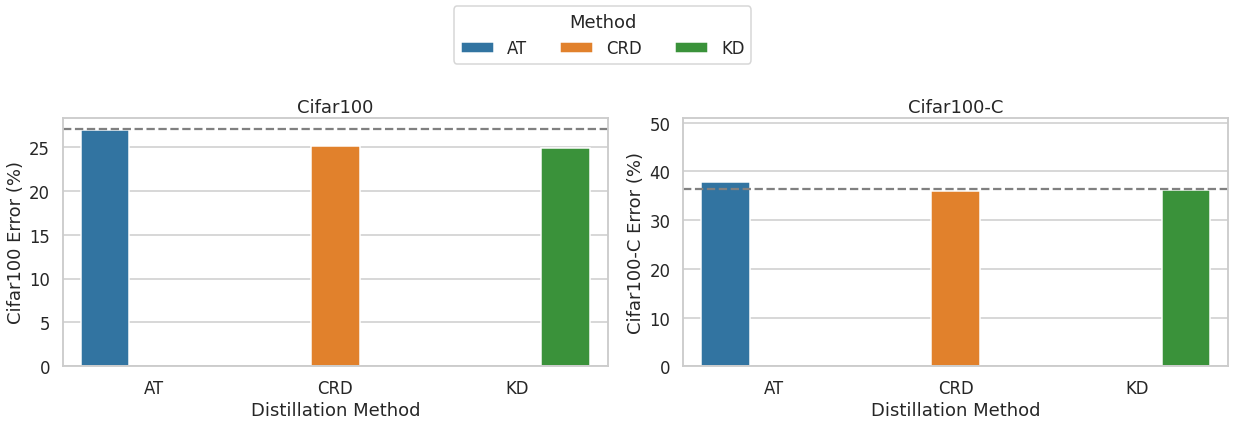

In [32]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(17.5, 5))
df_aug=df_aug.replace("AttentionDistill", "AT")
df_aug=df_aug.replace("ContrastiveDistill", "CRD")
df_aug=df_aug.replace("KnowledgeDistill", "KD")
for ax, error in zip(axes.flatten(), ["Cifar100 Error", "Cifar100-C Error"]):
    sns.barplot(data=df_aug, x="Loss", y=error, hue="Loss", ax=ax)
    ax.set_xlabel("Distillation Method")
    ax.set_ylabel(error + " (%)")
    if error=="Cifar100-C Error":
        ax.set_ylim(0,51)
    ax.set_title(error.split(" ")[0])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend('', frameon=False)
    ax.axhline(df_aug_baseline.query("Network == 'resnet18'")[error].item(), color="grey", ls="dashed")
fig.legend(handles, labels, bbox_to_anchor=(0.37, 1.2), loc=2, borderaxespad=0., ncol=3, title='Method')
fig.tight_layout()
plt.savefig(f"figures/distillation_augmix.pdf")